# Read Dataset

In [357]:
socar = pd.read_csv('insurance_fraud_detect_data.csv')
socar.drop(columns='test_set', inplace=True)
socar.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt
0,0,2,1,3,0,2,0,100,2,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
1,0,1,0,4,0,4,0,0,3,1,...,0.000000e+00,0,1,1,1,2,1,1,1,0
2,0,1,0,4,1,4,0,100,3,1,...,2.581306e+05,12925040,3,1,0,2,1,1,1,0
3,0,3,1,3,0,4,0,0,2,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
4,0,1,0,1,0,1,0,100,1,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1


In [358]:
socar[socar['repair_cost']!=0].mean(), socar[socar['repair_cost']!=0].median()

(fraud_YN                      0.001801
 car_model                     1.706324
 sharing_type                  0.137282
 age_group                     2.433660
 has_previous_accident         0.083750
 cumulative_use_count          2.548929
 b2b                           0.012207
 accident_ratio               94.649290
 pf_type                       1.792876
 socarpass                     0.158695
 socarsave                     0.083350
 start_hour                    3.684110
 duration                      2.212728
 accident_hour                 3.279067
 repair_cost              456292.366005
 insure_cost              966219.791575
 accident_location             1.318591
 car_part1                     0.354012
 car_part2                     0.149590
 repair_cnt                    1.443166
 acc_type1                     0.257555
 insurance_site_aid_YN         0.300680
 police_site_aid_YN            0.252552
 total_prsn_cnt               -0.533720
 dtype: float64,
 fraud_YN              

# EDA

In [359]:
import matplotlib.pyplot as plt

from matplotlib import pyplot

from matplotlib import font_manager

f_path = "C:\Windows\Fonts\Malgun.ttf"

font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc

rc('font', family='Malgun Gothic')

sns.set_style('whitegrid', {'font.family':'Malgun Gothic'})

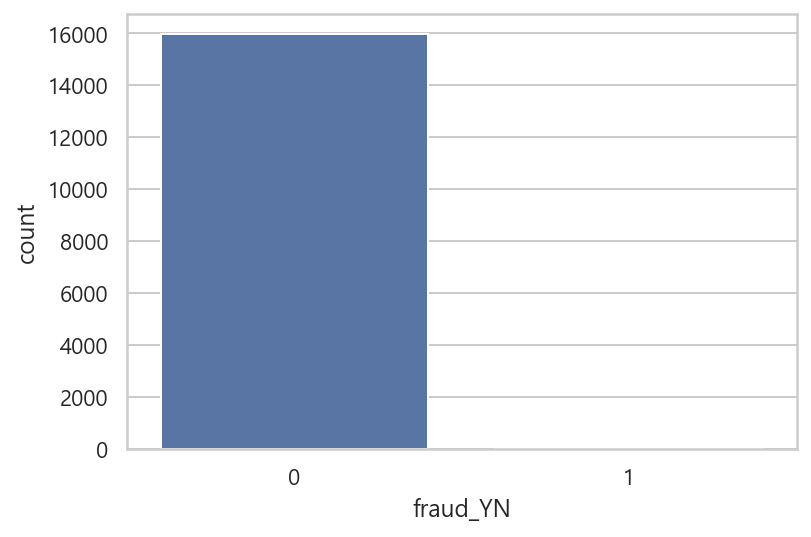

In [360]:
sns.countplot(data=socar, x='fraud_YN');

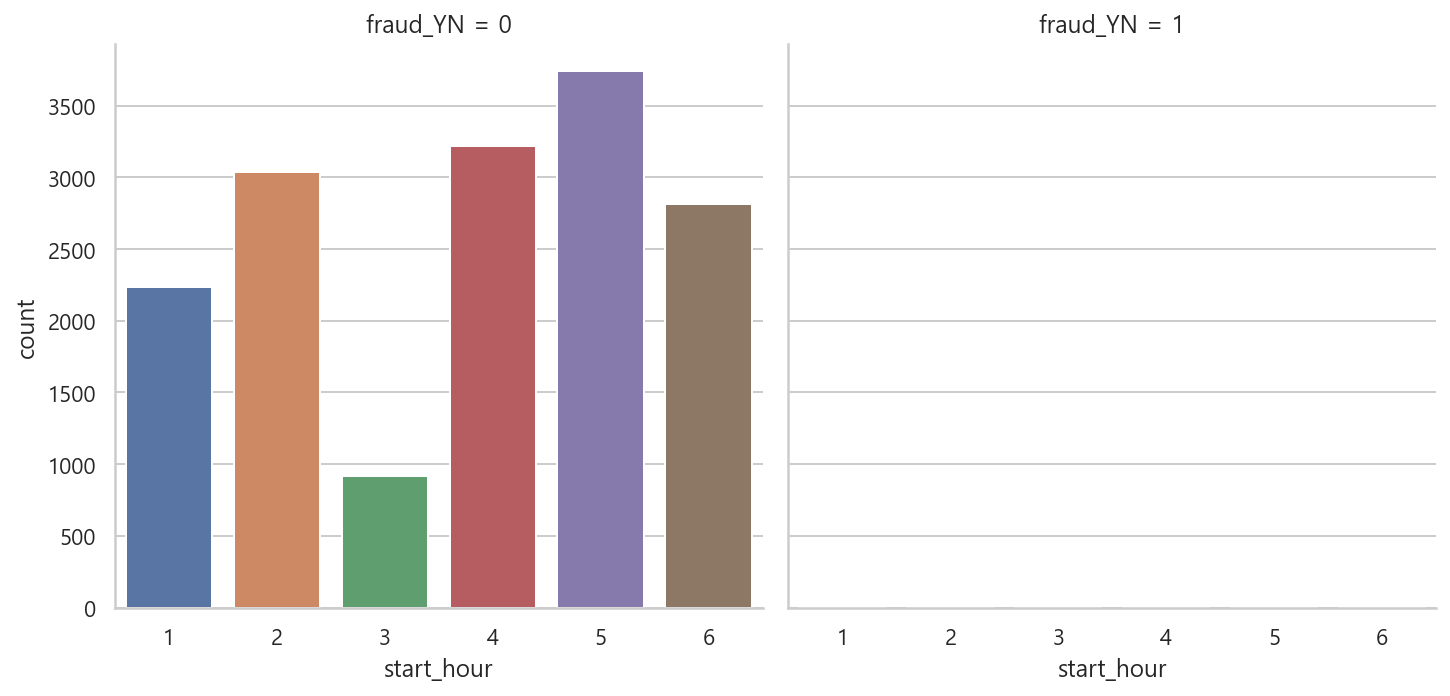

In [361]:
sns.catplot(data=socar, x='start_hour', col='fraud_YN', kind="count")

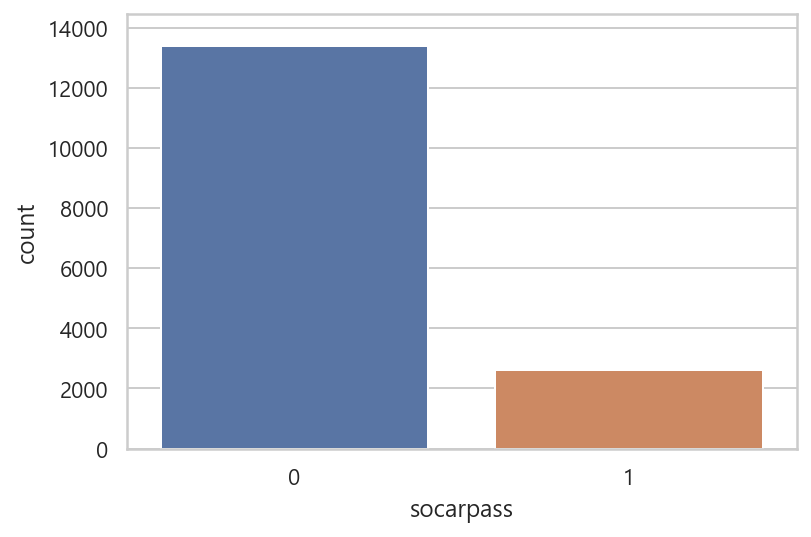

In [362]:
sns.countplot(data=socar, x='accident_ratio');
sns.countplot(data=socar, x='socarpass');

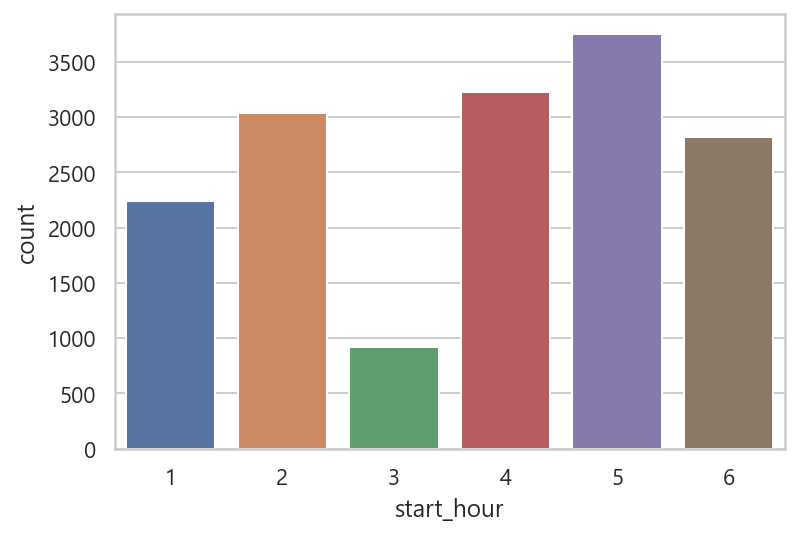

In [363]:
sns.countplot(data=socar, x='start_hour');

In [364]:
socar.columns

Index(['fraud_YN', 'car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour', 'repair_cost', 'insure_cost',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
       'total_prsn_cnt'],
      dtype='object')

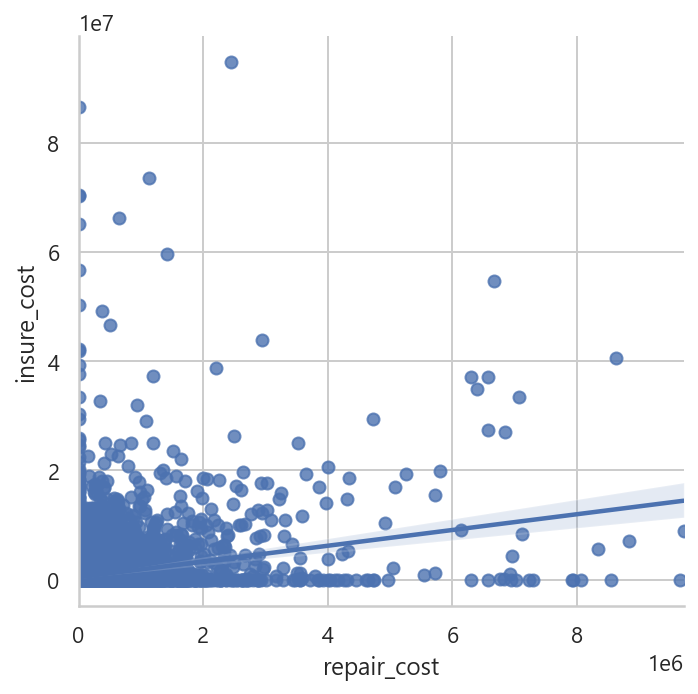

In [365]:
sns.lmplot(data=socar, x='repair_cost', y='insure_cost');

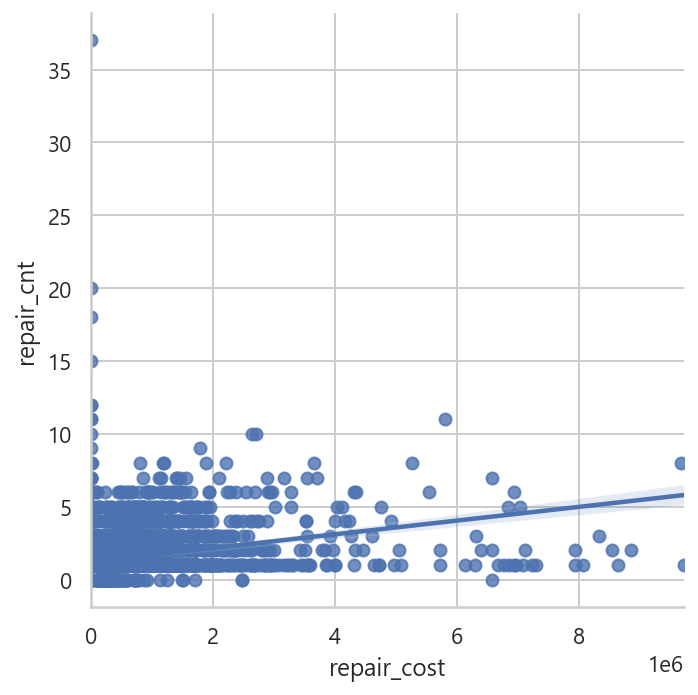

In [366]:
sns.lmplot(data=socar, x='repair_cost', y='repair_cnt');

In [367]:
socar.corr().iloc[0]

fraud_YN                 1.000000
car_model               -0.002440
sharing_type             0.000843
age_group               -0.007287
has_previous_accident    0.002222
cumulative_use_count    -0.002924
b2b                     -0.004120
accident_ratio           0.012013
pf_type                 -0.009864
socarpass               -0.002270
socarsave                0.012379
start_hour              -0.002098
duration                 0.012443
accident_hour           -0.002251
repair_cost              0.003409
insure_cost              0.002019
accident_location       -0.009159
car_part1                0.011833
car_part2               -0.003604
repair_cnt              -0.007751
acc_type1                0.024653
insurance_site_aid_YN    0.020999
police_site_aid_YN       0.019109
total_prsn_cnt           0.023513
Name: fraud_YN, dtype: float64

# Preprocessing

In [368]:
repair_cost_mean = socar[(socar['repair_cost'] < 3000000) & (socar['repair_cost'] > 100000)]['repair_cost'].mean(), 
repair_cost_median = socar[(socar['repair_cost'] < 3000000) & (socar['repair_cost'] > 100000)]['repair_cost'].median()

In [369]:
socar['repair_cost'][(socar['repair_cost'] >= 3000000)] = repair_cost_mean
socar['repair_cost'][(socar['repair_cost'] <= 100000)] = repair_cost_mean

In [370]:
insure_cost_mean = socar[(socar['insure_cost'] < 3000000) & (socar['insure_cost'] > 100000)]['insure_cost'].mean(), 
insure_cost_median = socar[(socar['insure_cost'] < 3000000) & (socar['insure_cost'] > 100000)]['insure_cost'].median()

In [371]:
socar['insure_cost'][(socar['insure_cost'] >= 3000000)] = insure_cost_mean
socar['insure_cost'][(socar['insure_cost'] <= 100000)] = insure_cost_mean

In [372]:
socar

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt
0,0,2,1,3,0,2,0,100,2,0,...,1.302547e+05,1.004197e+06,1,0,0,1,0,0,0,-1
1,0,1,0,4,0,4,0,0,3,1,...,4.355713e+05,1.004197e+06,1,1,1,2,1,1,1,0
2,0,1,0,4,1,4,0,100,3,1,...,2.581306e+05,1.004197e+06,3,1,0,2,1,1,1,0
3,0,3,1,3,0,4,0,0,2,0,...,1.341009e+06,1.004197e+06,3,1,0,1,0,0,0,-1
4,0,1,0,1,0,1,0,100,1,0,...,5.240306e+05,1.209410e+06,1,0,0,2,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,4.355713e+05,1.004197e+06,1,1,0,1,0,0,0,-1
15996,0,2,0,2,1,4,0,100,1,1,...,6.184394e+05,1.004197e+06,2,1,0,1,0,0,0,-1
15997,0,2,1,2,0,4,0,100,1,0,...,4.355713e+05,1.004197e+06,0,0,0,1,0,0,0,-1
15998,0,2,0,2,0,2,0,100,2,0,...,4.355713e+05,1.004197e+06,4,1,0,1,0,0,0,-1


# Scaling

In [373]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_ss = StandardScaler()
scaler_mm = MinMaxScaler()

socar['accident_ratio'] = scaler_mm.fit_transform(socar['accident_ratio'].values.reshape(-1,1))
socar['repair_cost'] = scaler_mm.fit_transform(socar['repair_cost'].values.reshape(-1,1))
socar['insure_cost'] = scaler_mm.fit_transform(socar['insure_cost'].values.reshape(-1,1))

# Split dataset

In [374]:
from sklearn.model_selection import train_test_split

X = socar.drop(['fraud_YN','total_prsn_cnt'], axis=1)
y = socar['fraud_YN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [375]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([12767,    33], dtype=int64))

In [376]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train) * 100

0.2578125

In [377]:
tmp = np.unique(y_test, return_counts=True)[1]
tmp[1]/len(y_test) * 100

0.25

In [378]:
tmp

array([3192,    8], dtype=int64)

# Evaluation

In [379]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [380]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('===========')
    
    print('Accuracy : {0:.4f}, Precision:{1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1:{1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [381]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=10, max_depth=2)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[3192    0]
 [   8    0]]
Accuracy : 0.9975, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [382]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[3192    0]
 [   8    0]]
Accuracy : 0.9975, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [383]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> confusion matrix
[[3192    0]
 [   8    0]]
Accuracy : 0.9975, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [384]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3192
           1       0.00      0.00      0.00         8

    accuracy                           1.00      3200
   macro avg       0.50      0.50      0.50      3200
weighted avg       1.00      1.00      1.00      3200



# Over Sampling

In [385]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [386]:
X_train.shape, y_train.shape

((12800, 22), (12800,))

In [387]:
X_train_over.shape, y_train_over.shape

((25534, 22), (25534,))

In [388]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([12767,    33], dtype=int64))

In [389]:
np.unique(y_train_over, return_counts=True)

(array([0, 1], dtype=int64), array([12767, 12767], dtype=int64))

In [390]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [391]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [392]:
models = [dt_clf, rf_clf, lgbm_clf]
models_names = ['DecisionTree', 'RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, models_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  1.804178237915039


,accuracy,precision,recall,f1,roc_auc
DecisionTree,0.556250,0.003516,0.625,0.006993,0.590539
RandomForest,0.996563,0.000000,0.000,0.000000,0.499530
LightGBM,0.997188,0.333333,0.125,0.181818,0.562187


# Hyper Parameter Tuning

In [393]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [2,4,6,8]}
socar_tree = DecisionTreeClassifier(max_depth=2, random_state=10)

gridsearch = GridSearchCV(estimator=socar_tree, param_grid=params, cv=5, scoring='recall')
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=10),
             param_grid={'max_depth': [2, 4, 6, 8]}, scoring='recall')

In [394]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.01201053, 0.01780939, 0.02360892, 0.02680373]),
    'mean_score_time': array([0.00280104, 0.00279813, 0.0027998 , 0.00260358]),
    'mean_test_score': array([0., 0., 0., 0.]),
    'param_max_depth': masked_array(data=[2, 4, 6, 8],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 6},
                  {'max_depth': 8}],
    'rank_test_score': array([1, 1, 1, 1]),
    'split0_test_score': array([0., 0., 0., 0.]),
    'split1_test_score': array([0., 0., 0., 0.]),
    'split2_test_score': array([0., 0., 0., 0.]),
    'split3_test_score': array([0., 0., 0., 0.]),
    'split4_test_score': array([0., 0., 0., 0.]),
    'std_fit_time': array([9.21098329e-06, 3.93452379e-04, 1.34971998e-03, 9.80498092e-04]),
    'std_score_time': array([0.0004005 , 0.00040856, 0.00039859, 0.00048944]),
    'std_test_score': array([0

In [395]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=10)

In [396]:
from sklearn.pipeline import Pipeline

In [397]:
estimators = [('scaler', MinMaxScaler()),
             ('clf', LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False))]
pipe = Pipeline(estimators)

In [398]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print_clf_eval(y_test, pred)

=> confusion matrix
[[3192    0]
 [   8    0]]
Accuracy : 0.9975, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000
